In [1]:
%pip install fashion-clip
%pip install faiss-cpu

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 KB 6.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 2.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 KB 2.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 KB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/779.1 MB 1.2 MB/s eta 0:09:55
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/usr/lib/python3/dist-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/usr/lib/python3/dist-packages

In [3]:
from fashion_clip.fashion_clip import FashionCLIP
import os
import numpy as np

ModuleNotFoundError: No module named 'fashion_clip'

In [2]:
from PIL import Image

# Define the size of the image (width, height) in pixels
width = 2048
height = 3072

# Create a new image with white background
image3 = Image.new("RGB", (width, height), (255, 0, 0))
image = Image.new("RGB", (width, height), (237, 216, 111))
image2 = Image.new("RGB", (width, height), (66, 135, 245))

# Save the image to a file
image3.save("images/rojo.jpg")
image.save("images/yellow.jpg")
image2.save("images/blue.jpg")

ModuleNotFoundError: No module named 'PIL'

In [3]:
image_names = ["images/rojo.jpg"] + ["images/yellow.jpg"] + ["images/blue.jpg"] + ["/mnt/c/Users/pablo/Desktop/hack/images/" + str(n) + ".jpg" for n in range(10000) if os.path.exists("/mnt/c/Users/pablo/Desktop/hack/images/" + str(n) + ".jpg")]

In [ ]:
fclip = FashionCLIP('fashion-clip')

# we create image embeddings and text embeddings
image_embeddings = fclip.encode_images(image_names, batch_size=32)
image_embeddings = image_embeddings/np.linalg.norm(image_embeddings, ord=2, axis=-1, keepdims=True)

In [ ]:
print(image_embeddings.shape)
# save the embeddings
np.save('image_embeddings.npy', image_embeddings)

In [4]:
image_embeddings = np.load('image_embeddings.npy')

In [5]:
rojo = image_embeddings[0]
yellow = image_embeddings[1]
blue = image_embeddings[2]
image_embeddings.shape

(7559, 512)

In [6]:
yellow_indexes = [34, 412, 457, 719, 802, 1119, 1122, 1175, 1355, 1445]
yellow_indexes = [i+2 for i in yellow_indexes]

red_indexes = [18, 26, 55, 80, 185, 222, 446, 449, 532, 617, 691, 778, 813, 858, 936, 1017, 1185, 1195, 1259, 1320]
red_indexes = [i+2 for i in red_indexes]

-1e-06


-9e-07


-8e-07


-7e-07


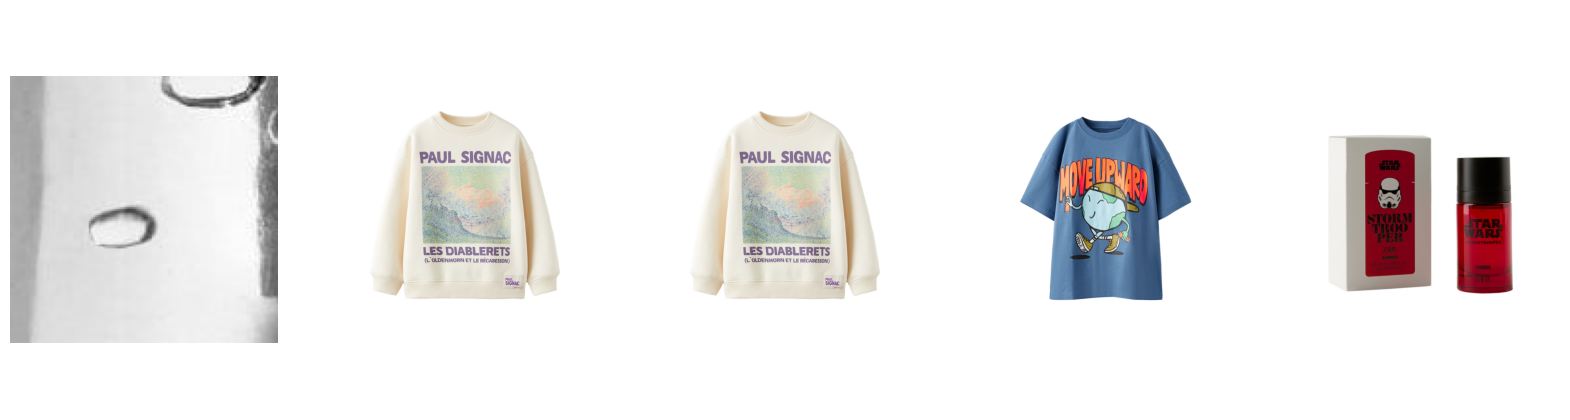

-6e-07


-5e-07


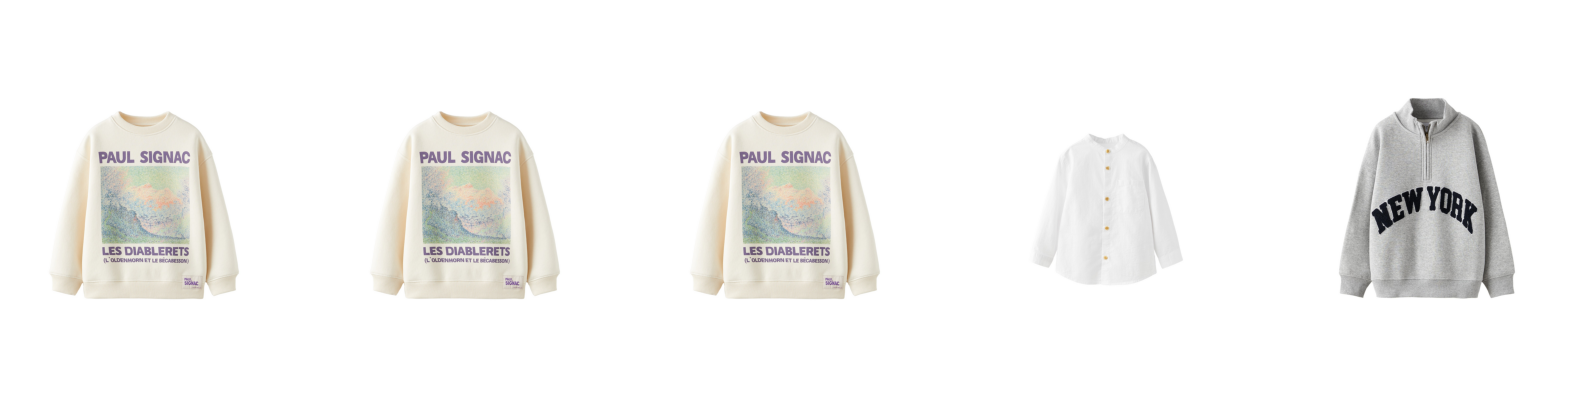

-4e-07


-3e-07


-2e-07


-1e-07


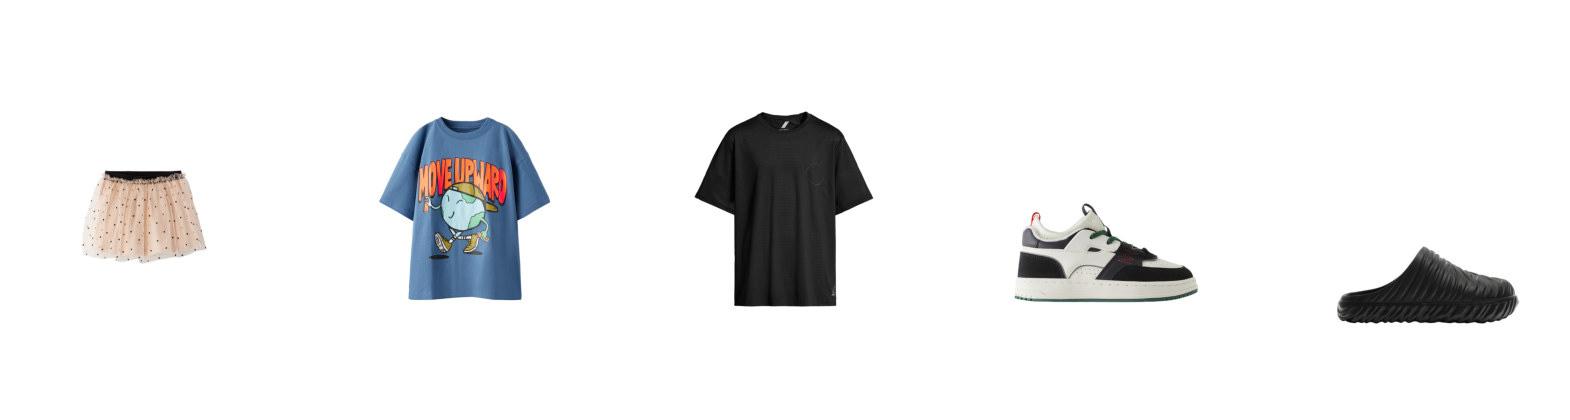

0.0


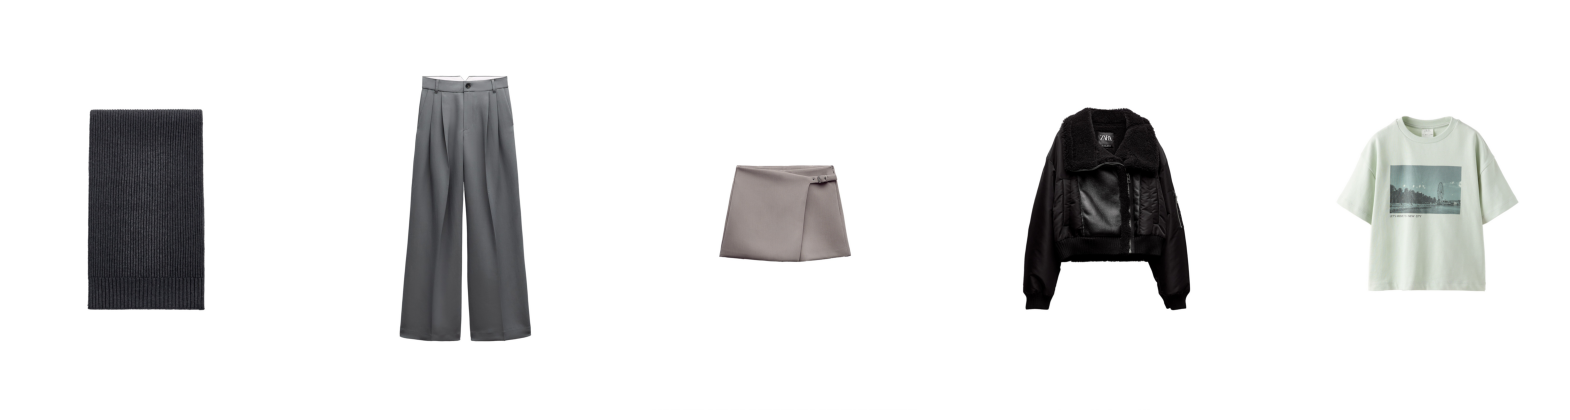

1e-07


2e-07


3e-07


4e-07


5e-07


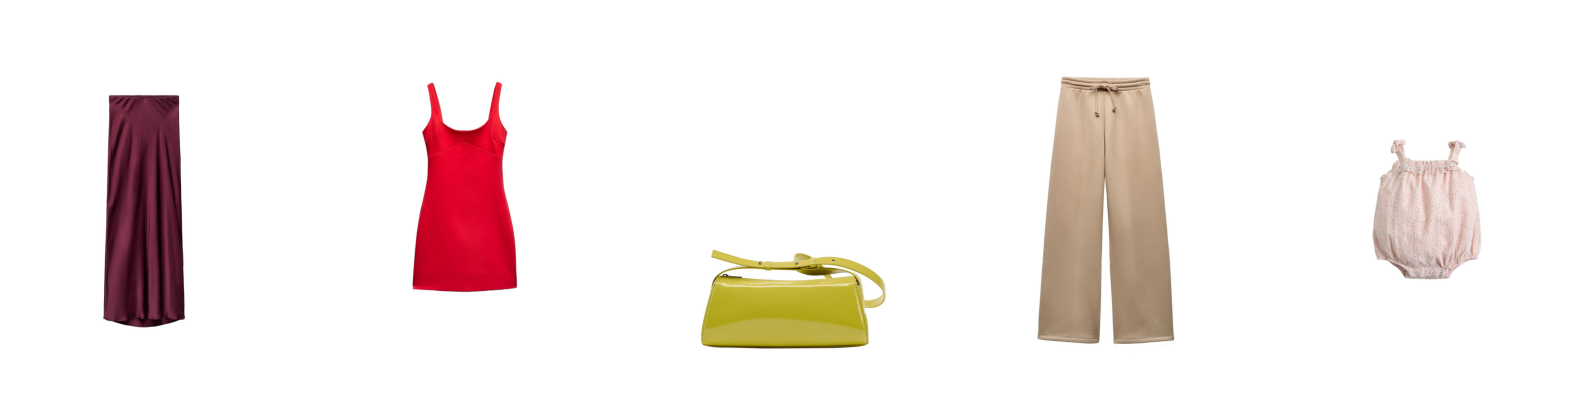

6e-07


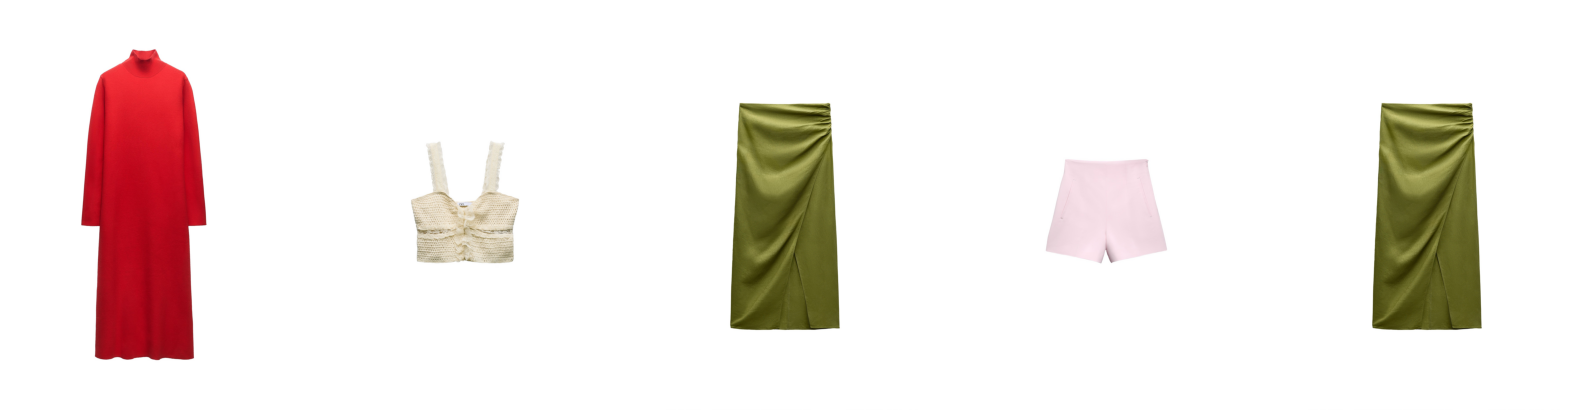

7e-07


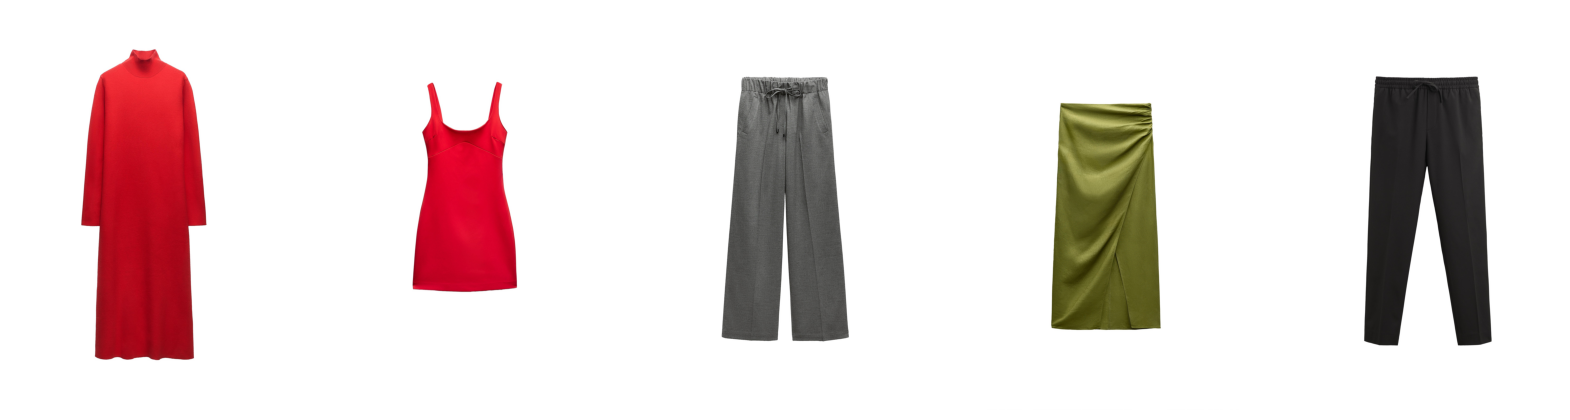

8e-07


9e-07


In [88]:
import faiss
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# we create an index
index = faiss.IndexFlatL2(image_embeddings.shape[1])
index.add(image_embeddings)

selected_image_index = 145+2

avg_yellow = np.mean(image_embeddings[yellow_indexes + [1]], axis=0)
avg_yellow.shape

avg_red = np.mean(image_embeddings[red_indexes + [0]], axis=0)
avg_red.shape

# we search for the nearest neighbors
D, I = index.search(image_embeddings[selected_image_index].reshape(1, -1), 5)

for i in range(-10, 10):
    i = i/10000000
    print(i)
    selected_modified = avg_red * i
    D, I = index.search(selected_modified.reshape(1, -1), 5)
    plt.figure(figsize=(20, 10))
    for i, idx in enumerate(I[0]):
        plt.subplot(1, 5, i + 1)
        plt.imshow(mpimg.imread(image_names[idx]))
        plt.axis('off')
    plt.show()

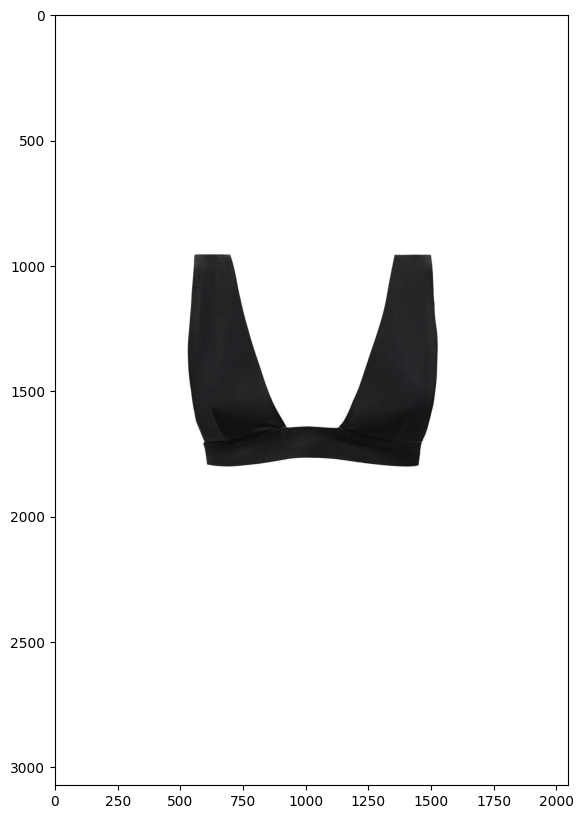

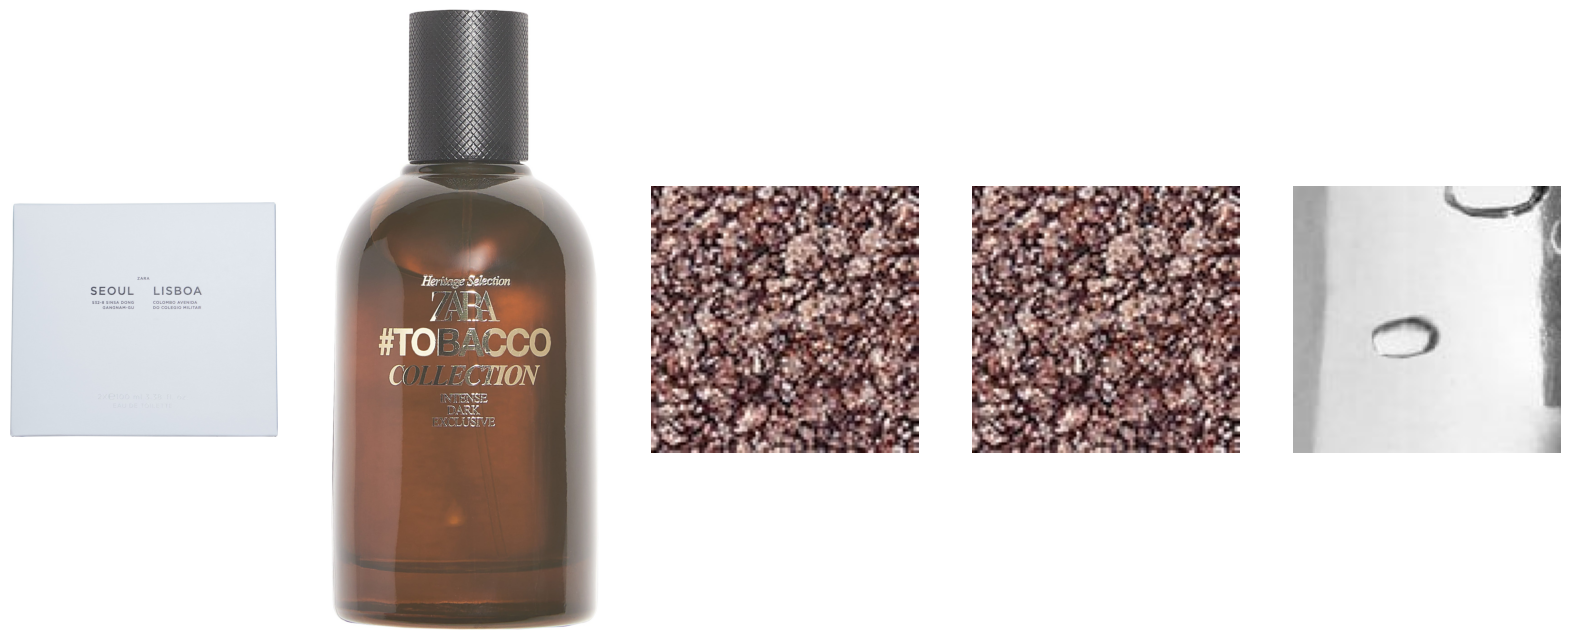

In [69]:


# plot the selected images
plt.figure(figsize=(20, 10))
plt.imshow(mpimg.imread(image_names[selected_image_index]))

plt.figure(figsize=(20, 10))
for i, idx in enumerate(I[0]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mpimg.imread(image_names[idx]))
    plt.axis('off')
plt.show()

In [10]:
#Gram-Schmidt

def gram_schmidt(basis):
    res = np.zeros(basis.shape)
    res[:, 0] = basis[:, 0]
    for k in range(1, basis.shape[1]):
        vec = basis[:, k]
        acum = 0
        for i in range(0, k):
            lamb = np.dot(basis[:, k], res[:, i]) / np.dot(res[:, i], res[:, i])
            acum += lamb * res[:, i]
        res[:, k] = vec - acum

    return res


In [73]:
import numpy as np

mod_value = -5

identity = np.eye(image_embeddings.shape[1])
identity[:,0] = avg_red
orthogonal = gram_schmidt(identity)
inv_orthogonal = np.linalg.inv(orthogonal)
trasnf = np.eye(image_embeddings.shape[1])
trasnf[0, 0] = mod_value

new_embeddings = orthogonal @ trasnf @ inv_orthogonal @ image_embeddings.T
new_embeddings = new_embeddings.T 


In [ ]:
# mod_value = 4

# a = np.array([1, 1, 0])
# b = np.array([[1, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 0], [0, 1, 0], [0, 0, 1]])

# identity = np.eye(b.shape[1])
# identity[:,0] = a
# orthogonal = gram_schmidt(identity)
# inv_orthogonal = np.linalg.inv(orthogonal)
# trasnf = np.eye(b.shape[1])
# trasnf[0, 0] = mod_value

# new_embeddings = orthogonal @ trasnf @ inv_orthogonal @ b.T
# new_embeddings = new_embeddings.T 

# print(new_embeddings)


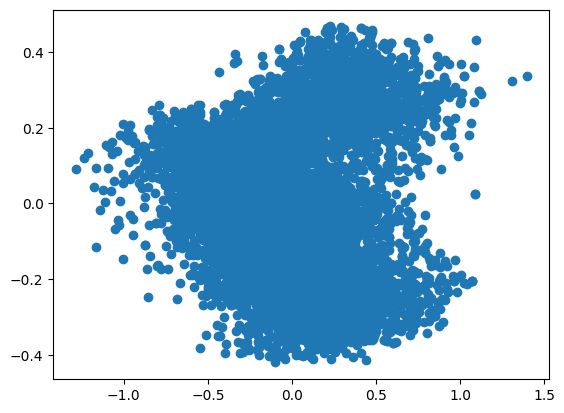

In [74]:
#plot pca
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#plot 3d new embeddings
# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(new_embeddings[:, 0], new_embeddings[:, 1], new_embeddings[:, 2])
# plt.show()

pca = PCA(n_components=3)
pca.fit(new_embeddings)
new_embeddings_pca = pca.transform(new_embeddings)

plt.scatter(new_embeddings_pca[:, 0], new_embeddings_pca[:, 1])
plt.show()

# plot variance explained
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.80, color='r', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Explained variance ratio')
plt.show()


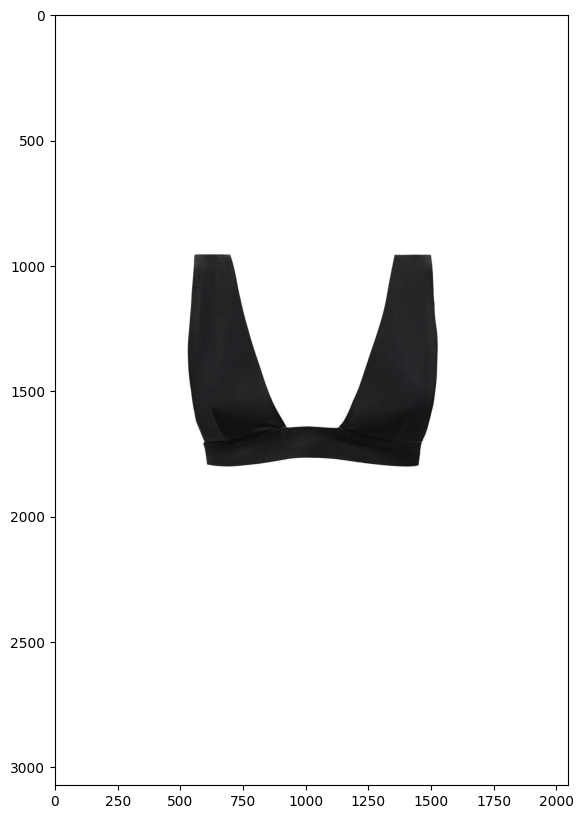

In [75]:
import faiss

# we create an index
index = faiss.IndexFlatIP(new_embeddings.shape[1])
index.add(new_embeddings)

plt.figure(figsize=(20, 10))
plt.imshow(mpimg.imread(image_names[selected_image_index]))

# we search for the nearest neighbors
D, I = index.search(new_embeddings[selected_image_index].reshape(1, -1), 5)

plt.figure(figsize=(20, 10))
for i, idx in enumerate(I[0]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mpimg.imread(image_names[idx]))
    plt.axis('off')
plt.show()